In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environmenttt.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time
import csv

def export_to_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Key', 'Value'])

        # Write data
        for key, value in data.items():
            csv_writer.writerow([key, value])



start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

hours=0
minutes=0.2

run_time=60*60*hours+60*minutes # # # # # # # # # # # #  # # # # # # # # # # runtime

while time.time()<start_time+run_time:
#for asdf in range(1, 5):

  Current_time=time.time()-start_time
  time_fraction=Current_time/run_time

  global lr
  lr=10**(-0.35)
  lr=round(lr, 4)
  global df
  df=0.9
  global eps
  #eps=10**(-4)
  #eps=(time_fraction)**4
  #eps=10**(-0.5*(asdf+1))
  #eps=10**(-0.2*(asdf))
  eps=10**(-3.5)
  eps=round(eps, 4)
  global number_of_steps
  number_of_steps = 20 # # # # # # # #  # # # # # # # # #  number of steps

  reward=0



  class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1])
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon and n-30<=trial:
            # take random action
            action = np.random.choice(self.actions)

        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]

      for episode in range(number_of_steps):
          state = env.reset()

          #global number_of_steps
          n=(episode//int(number_of_steps/20))*10+10
          if episode%(number_of_steps/20)==0:
            print(n)

          if episode==(number_of_steps-1):

              filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables2/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
              export_to_csv(qarr, filename)


          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                  episode_plot=np.concatenate((episode_plot, [episode]))
                  reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  trial_plot = np.concatenate((trial_plot, [trial]))


                  break





  #f=plt.figure(1)
  #plt.plot(episode_plot, reward_sum_plot)
  #f.show()

  #g=plt.figure(2)
  #plt.plot(episode_plot, trial_plot)
  #g.show()

  data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

  #import csv

  # field names
  #fields = ['Episode', 'Reward', 'Trials']

  # data rows of csv file
  rows = data_array

  # name of csv file
  #filename = "university_records.csv"
  filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs2/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
  print(filename)

  # writing to csv file
  with open(filename, 'w') as csvfile:
      # creating a csv writer object
      csvwriter = csv.writer(csvfile)

      # writing the fields
      #csvwriter.writerow(fields)

      # writing the data rows
      csvwriter.writerows(rows)
  #agent.q_table()
  print((time.time() - start_time))
  #plt.pause(0)

Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.0/690.0 kB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=19c205103c6ab1

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

import pandas as pd
import matplotlib.pyplot as plt
import os

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for file in directory_files:
    data = pd.read_csv(os.path.join(directory_path, file))#, encoding = 'ISO-8859-1',low_memory=False)
    #df = pd.concat([df, df_file])
    i=i+1
    f=plt.figure(i)
    #print(data.size)
    plt.title(file)
    plt.plot(range(1,int((data).size/2)+1), data.iloc[0])
    f.show()

Output hidden; open in https://colab.research.google.com to view.

Mounted at /content/drive


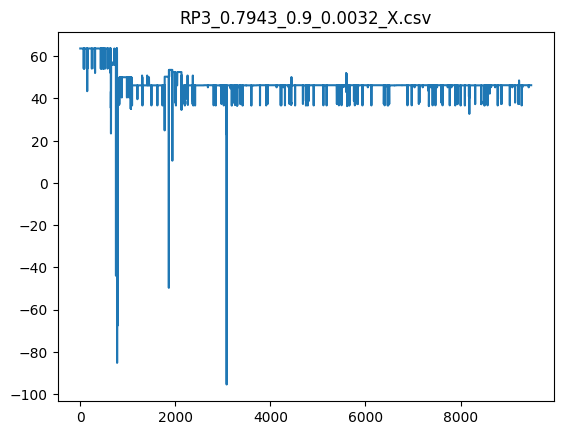

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

import pandas as pd
import matplotlib.pyplot as plt
import os

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()

file='RP3_0.7943_0.9_0.0032_X.csv'

data = pd.read_csv(os.path.join(directory_path, file))#, encoding = 'ISO-8859-1',low_memory=False)
#df = pd.concat([df, df_file])

f=plt.figure(12345)
#print(data.size)
plt.title(file)
plt.plot(range(1,int((data).size/2)+1), data.iloc[0])
f.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

#!python3 --version
#!pip install pybullet
#!pip install gymnasium
#!pip install urdfpy

#import numpy as np
#import random
#import pybullet as p
#from environmenttt import Env
#from collections import defaultdict
#import os
#import matplotlib.pyplot as plt
#import math
#import pandas as pd

#cwd = os.getcwd() # Get the current working directory (cwd)
#files = os.listdir(cwd) # Get all the files in that directory
import pandas as pd
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0





reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for filename in directory_files:
  print(filename)

  if filename[0]=='R':
    continue


  class QLearningAgent:
      def __init__(self, actions):
          # actions = [0, 1, 2, 3]
          global lr
          global df
          global eps
          self.actions = actions
          self.learning_rate = lr #was 0.01
          self.discount_factor = df #was 0.9
          self.epsilon = eps# was 0.1
          #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
          PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
          self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

          ##################################################
          global qarr
          qarr=self.q_table

      # update q function with sample <s, a, r, s'>
      def learn(self, state, action, reward, next_state):
          current_q = self.q_table[state][action]
          #print(state)
          xx=7
          yy=0
          if state!="None":

            global g
            global ij
            g=plt.figure(filename+"1")
            ij=ij+1
            #xx=int(state[1])
            #yy=int(state[4])
            if state[3]==",":
              xx=int(str(state[1]+state[2]))
              if state[6]==",":
                yy=int(state[5])
              else:
                yy=int(str(state[5]+state[6]))

            else:
              xx=int(state[1])
              if state[5]==",":
                yy=int(state[4])
              else:
                yy=int(str(state[4]+state[5]))


            plt.text(xx, yy, ij, color="red", fontsize=12)
            plt.axis([0, 20, 0, 10])
            plt.plot(xx, yy, marker = 'o')




          # using Bellman Optimality Equation to update q function
          new_q = reward + self.discount_factor * max(self.q_table[next_state])
          self.q_table[state][action] += self.learning_rate * (new_q - current_q)
          global qarr
          qarr=self.q_table
          #print(self.q_table)

      # get action for the state according to the q function table
      # agent pick action of epsilon-greedy policy
      def get_action(self, state):
          #self.epsilon=self.epsilon*0.99995
          if np.random.rand() < self.epsilon:
              # take random action
              action = np.random.choice(self.actions)
          else:
              # take action according to the q function table
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
          return action

      @staticmethod
      def arg_max(state_action):
          max_index_list = []
          max_value = state_action[0]
          for index, value in enumerate(state_action):
              if value > max_value:
                  max_index_list.clear()
                  max_value = value
                  max_index_list.append(index)
              elif value == max_value:
                  max_index_list.append(index)
          return random.choice(max_index_list)

      def q_table(self):
          print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      #global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]





      for episode in range(number_of_steps):
          state = env.reset()



          #global number_of_steps######################################
          n=160
          local_reward_plot=[]
          trigger_25=1
          trigger_50=1
          trigger_75=1
          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              if reward_sum>=25*0.6273 and trigger_25==1:
                print("25% covered after ", trial, "Trials")
                trigger_25=0

              if reward_sum>=50*0.6273 and trigger_50==1:
                print("50% covered after ", trial, "Trials")
                trigger_50=0

              if reward_sum>=75*0.6273 and trigger_75==1:
                print("75% covered after ", trial, "Trials")
                trigger_75=0

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.6273, "%")

                  episode_plot=np.concatenate((episode_plot, [episode]))
                  reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  trial_plot = np.concatenate((trial_plot, [trial]))


                  break
  global g
  g.show()


  f=plt.figure(filename)
  #plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6273)

  ax = f.add_subplot(1, 1, 1)

  ax.set_xticks(np.arange(0, 161, 10))
  ax.set_xticks(np.arange(0, 161, 2), minor=True)
  ax.set_yticks(np.arange(0, 101, 10))
  ax.set_yticks(np.arange(0, 101, 2), minor=True)

  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)

  plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6905)

  plt.title(filename)

  data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')

  plt.plot(np.linspace(1, 109, 110), data.iloc[0], 'r--')

  f.show()



Mounted at /content/drive


NameError: name 'os' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
import pandas as pd
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0

global continuous_coord_x
continuous_coord_x=[]
global continuous_coord_y
continuous_coord_y=[]



reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for filename in directory_files:
  print(filename)

  if filename[0]=='R':
    continue


  class QLearningAgent:
      def __init__(self, actions):
          # actions = [0, 1, 2, 3]
          global lr
          global df
          global eps
          self.actions = actions
          self.learning_rate = lr #was 0.01
          self.discount_factor = df #was 0.9
          self.epsilon = eps# was 0.1
          #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
          PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
          self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

          ##################################################
          global qarr
          qarr=self.q_table

      # update q function with sample <s, a, r, s'>
      def learn(self, state, action, reward, next_state):
          current_q = self.q_table[state][action]
          #print(state)
          xx=7
          yy=0
          if state!="None":


            global ij
            g=plt.figure(filename+"1")
            ij=ij+1
            #xx=int(state[1])
            #yy=int(state[4])
            if state[3]==",":
              xx=int(str(state[1]+state[2]))
              if state[6]==",":
                yy=int(state[5])
              else:
                yy=int(str(state[5]+state[6]))

            else:
              xx=int(state[1])
              if state[5]==",":
                yy=int(state[4])
              else:
                yy=int(str(state[4]+state[5]))


          global continuous_coord_x
          global continuous_coord_y

          continuous_coord_x= np.concatenate((continuous_coord_x, [xx]))
          continuous_coord_y= np.concatenate((continuous_coord_y, [yy]))
            #print(xx, yy)


          # using Bellman Optimality Equation to update q function
          new_q = reward + self.discount_factor * max(self.q_table[next_state])
          self.q_table[state][action] += self.learning_rate * (new_q - current_q)
          global qarr
          qarr=self.q_table
          #print(self.q_table)

      # get action for the state according to the q function table
      # agent pick action of epsilon-greedy policy
      def get_action(self, state):
          #self.epsilon=self.epsilon*0.99995
          if np.random.rand() < self.epsilon:
              # take random action
              action = np.random.choice(self.actions)
          else:
              # take action according to the q function table
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
          return action

      @staticmethod
      def arg_max(state_action):
          max_index_list = []
          max_value = state_action[0]
          for index, value in enumerate(state_action):
              if value > max_value:
                  max_index_list.clear()
                  max_value = value
                  max_index_list.append(index)
              elif value == max_value:
                  max_index_list.append(index)
          return random.choice(max_index_list)

      def q_table(self):
          print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      #global qarr
      print(qarr)


      continuous_coord_x=[]
      continuous_coord_y=[]



      for episode in range(number_of_steps):
          state = env.reset()



          #global number_of_steps######################################
          n=160
          local_reward_plot=[]
          trigger_25=1
          trigger_50=1
          trigger_75=1
          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              if reward_sum>=25*0.6273 and trigger_25==1:
                print("25% covered after ", trial, "Trials")
                trigger_25=0

              if reward_sum>=50*0.6273 and trigger_50==1:
                print("50% covered after ", trial, "Trials")
                trigger_50=0

              if reward_sum>=75*0.6273 and trigger_75==1:
                print("75% covered after ", trial, "Trials")
                trigger_75=0

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.6905, "%")




                  break


  h=plt.figure(1)
  #print(continuous_coord_x)
  plt.plot(continuous_coord_x, continuous_coord_y)
  h.show()

Output hidden; open in https://colab.research.google.com to view.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1


reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
plot_25=np.ones((10, 8))*250
#plot_25=np.ones((3, 4))*250
plot_50=np.ones((10, 8))*250
plot_75=np.ones((10, 8))*250
plot_n100=np.zeros((10, 8))
plot_n150= np.zeros((10, 8))
total_covered_plot=np.zeros((10, 8))

for filename in directory_files:
  print(filename)
  if filename[0]=='R':
    continue
  xxxx=int(filename[0])
  yyyy=int(filename[1])


  class QLearningAgent:
      def __init__(self, actions):
          # actions = [0, 1, 2, 3]
          global lr
          global df
          global eps
          self.actions = actions
          self.learning_rate = lr #was 0.01
          self.discount_factor = df #was 0.9
          self.epsilon = eps# was 0.1
          #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
          PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
          self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

          ##################################################
          global qarr
          qarr=self.q_table

      # update q function with sample <s, a, r, s'>
      def learn(self, state, action, reward, next_state):
          current_q = self.q_table[state][action]
          #print(state)


          # using Bellman Optimality Equation to update q function
          new_q = reward + self.discount_factor * max(self.q_table[next_state])
          self.q_table[state][action] += self.learning_rate * (new_q - current_q)
          global qarr
          qarr=self.q_table
          #print(self.q_table)

      # get action for the state according to the q function table
      # agent pick action of epsilon-greedy policy
      def get_action(self, state):
          #self.epsilon=self.epsilon*0.99995
          if np.random.rand() < self.epsilon:
              # take random action
              action = np.random.choice(self.actions)
          else:
              # take action according to the q function table
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
          return action

      @staticmethod
      def arg_max(state_action):
          max_index_list = []
          max_value = state_action[0]
          for index, value in enumerate(state_action):
              if value > max_value:
                  max_index_list.clear()
                  max_value = value
                  max_index_list.append(index)
              elif value == max_value:
                  max_index_list.append(index)
          return random.choice(max_index_list)

      def q_table(self):
          print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      #global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]

      for episode in range(number_of_steps):
          state = env.reset()



          #global number_of_steps######################################
          n=160
          mr=0.706387
          fs=20
          padding=22
          local_reward_plot=[]
          trigger_25=1
          trigger_50=1
          trigger_75=1
          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              if reward_sum>=25*mr and trigger_25==1:
                print("25% covered after ", trial, "Trials")
                trigger_25=0
                plot_25[xxxx, yyyy]=trial

              if reward_sum>=50*mr and trigger_50==1:
                print("50% covered after ", trial, "Trials")
                trigger_50=0
                plot_50[xxxx, yyyy]=trial

              if reward_sum>=75*mr and trigger_75==1:
                print("75% covered after ", trial, "Trials")
                trigger_75=0
                plot_75[xxxx, yyyy]=trial

              if trial==100:
                print(reward_sum/mr, "% covered after 100 Trials")
                plot_n100[xxxx, yyyy]=reward_sum/mr

              if trial==150:
                print(reward_sum/mr, "% covered after 150 Trials")
                plot_n150[xxxx, yyyy]=reward_sum/mr

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  total_covered_plot[xxxx, yyyy]=reward_sum/mr

                  print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/mr, "%")

                  #episode_plot=np.concatenate((episode_plot, [episode]))
                  #reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  #trial_plot = np.concatenate((trial_plot, [trial]))

                  break
  #global g
  #g.show()


  #f=plt.figure(xxxx)


  #plt.plot(np.linspace(1, n+1, n), local_reward_plot/mr)

  #plt.title(filename)

  #data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')

  #plt.plot(np.linspace(1, 109, 110), data.iloc[0], 'r--')

  #f.show()

#xlab=[0.2, 0.4, 0.6, 0.8]
#ylab=[0.35, 0.4, 0.45]

xlab=[1.0, 2.0, 3.0, 4.0]
ylab=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
extents=[0.25, 4.25, 0.05, 1.05]

#plt.imshow(25/plot_25, cmap='autumn',extent=[0.1,0.9,0.325,0.475],interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
plt.imshow(25/plot_25, cmap='autumn', extent=extents, interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)

cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)

plt.show()

plt.imshow(50/plot_50, cmap='autumn',extent=extents,interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)
plt.show()

plt.imshow(75/plot_75, cmap='autumn',extent=extents,interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)
plt.show()

plt.imshow(plot_n100/100, cmap='autumn',extent=extents,interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)
plt.show()

plt.imshow(plot_n150/150, cmap='autumn',extent=extents,interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)
plt.show()

combined = ((25/plot_25)+(50/plot_50)+(75/plot_75)+(plot_n100/100)+(plot_n150/150))/5

plt.imshow(combined, cmap='autumn',extent=extents,interpolation='nearest',origin='lower',aspect=5, vmin=0, vmax=1.1)
cbar = plt.colorbar()
cbar.set_label('Area Covered Per Step [%]', rotation=270, labelpad=padding, fontsize=fs)
cbar.ax.tick_params(labelsize=fs)
plt.xticks(xlab, rotation=0, fontsize=fs)
plt.yticks(ylab, fontsize=fs)
plt.xlabel("-log(ε)", fontsize=fs)
plt.ylabel("-log(α)", fontsize=fs)
plt.show()

#plt.imshow(xlab, ylab, total_covered_plot, annot=True,  linewidths=.5, cmap='autumn')
#plt.gca().invert_yaxis()
#plt.xlabel("-log(ε) [-]")
#plt.ylabel("-log(α) [-]")
#plt.title( "25% Heat Map" )
#plt.show()

Output hidden; open in https://colab.research.google.com to view.